Задание 1. Загрузка данных

Изучить представленный набор данных на основе описания его столбцов, загрузить его и оставить 8 столбцов для дальнейшего изучения: surgery?, Age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome.

Задание 2. Первичное изучение данных

Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

Задание 3. Работа с пропусками

Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Читаем файл
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv', sep=',', na_values='?')

df.head()

,2,1,530101,38.50,66,28,3,3.1,?,2.1,...,45.00,8.40,?.4,?.5,2.2,2.3,11300,00000,00000.1,2.4
0,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
1,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
2,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
3,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
4,2.0,1,528355,NaN,NaN,NaN,2.0,1.0,3.0,1.0,...,NaN,NaN,NaN,NaN,1.0,2,0,0,0,2


In [ ]:
#Для удобства переименовываем названия столбцов согласно описанию документа
df.columns = ['surgery?', 'Age', 'Hospital Number', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities', 'peripheral pulse', 'mucous membranes', 'capillary refill time', 'pain', 'peristalsis', 'abdominal distension', 'nasogastric tube', 'nasogastric reflux', 'nasogastric reflux PH', 'rectal examination', 'abdomen', 'packed cell volume', 'total protein', 'abdominocentesis appearance', 'abdomcentesis total protein', 'outcome', 'surgical lesion?', 'type of lesion', 'type of lesion1', 'type of lesion2', 'cp_data']
df.head()

,surgery?,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion?,type of lesion,type of lesion1,type of lesion2,cp_data
0,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
1,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
2,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
3,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
4,2.0,1,528355,NaN,NaN,NaN,2.0,1.0,3.0,1.0,...,NaN,NaN,NaN,NaN,1.0,2,0,0,0,2


In [ ]:
#Оставляем нужные столбцы
df_new = df[['surgery?', 'Age', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities', 'pain', 'outcome']]
df_new.head()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
1,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
2,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
3,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
4,2.0,1,NaN,NaN,NaN,2.0,2.0,1.0


In [ ]:
df_new.dtypes

surgery?                      float64
Age                             int64
rectal temperature            float64
pulse                         float64
respiratory rate              float64
temperature of extremities    float64
pain                          float64
outcome                       float64
dtype: object

Минимум, максимум


In [ ]:
print('Темпиратура')
print(df_new['rectal temperature'].min())
print(df_new['rectal temperature'].max())

print('Пульс')
print(df_new['pulse'].min())
print(df_new['pulse'].max())

print('Частота дыхания')
print(df_new['respiratory rate'].min())
print(df_new['respiratory rate'].max())

Темпиратура
35.4
40.8
Пульс
30.0
184.0
Частота дыхания
8.0
96.0


Среднеарифметическое

In [ ]:
print('Темпиратура')
print(df_new['rectal temperature'].mean())

print('Пульс')
print(df_new['pulse'].mean())

print('Частота дыхания')
print(df_new['respiratory rate'].mean())

Темпиратура
38.166527196652716
Пульс
71.93454545454546
Частота дыхания
30.42738589211618


Медиана

In [ ]:
print('Темпиратура')
print(df_new['rectal temperature'].median())

print('Пульс')
print(df_new['pulse'].median())

print('Частота дыхания')
print(df_new['respiratory rate'].median())

Темпиратура
38.2
Пульс
64.0
Частота дыхания
24.0


Мода

In [ ]:
#Чаще всего встречаются взрослые лошади
print('Значение моды: ', df_new['Age'].mode()[0])

#Чаще всего встречаются лошади с проведенной операцией
print('Значение моды: ', df_new['surgery?'].mode()[0])

Значение моды:  1
Значение моды:  1.0


СКО

In [ ]:
print('Темпиратура')
print(df_new['rectal temperature'].std())

print('Пульс')
print(df_new['pulse'].std())

print('Частота дыхания')
print(df_new['respiratory rate'].std())

Темпиратура
0.7335083691537396
Пульс
28.680522003654737
Частота дыхания
17.678256330531212


Дисперсия


In [ ]:
print('Темпиратура')
print(df_new['rectal temperature'].var())

print('Пульс')
print(df_new['pulse'].var())

print('Частота дыхания')
print(df_new['respiratory rate'].var())

Темпиратура
0.5380345276185787
Пульс
822.5723424021235
Частота дыхания
312.5207468879669


Квартили и размах


In [ ]:
# первый и третий квартили темпиратуры
print('Квартили темпиратуры')
print(df_new['rectal temperature'].quantile([0.25, 0.75]))

# межквартильный размах темпиратуры
Q1 = df_new['rectal temperature'].quantile(0.25)
Q3 = df_new['rectal temperature'].quantile(0.75)
IQR = Q3 - Q1
print('Межквартильный размах темпиратуры', IQR)

# первый и третий квартили пульса
print('Квартили пульса')
print(df_new['pulse'].quantile([0.25, 0.75]))

# межквартильный размах пульса
Q1 = df_new['pulse'].quantile(0.25)
Q3 = df_new['pulse'].quantile(0.75)
IQR = Q3 - Q1
print('Межквартильный размах пульса', IQR)

# первый и третий квартили Частоты дыхания
print('Квартили Частоты дыхания')
print(df_new['respiratory rate'].quantile([0.25, 0.75]))

# межквартильный размах Частоты дыхания
Q1 = df_new['respiratory rate'].quantile(0.25)
Q3 = df_new['respiratory rate'].quantile(0.75)
IQR = Q3 - Q1
print('Межквартильный размах Частоты дыхания', IQR)

Квартили темпиратуры
0.25    37.8
0.75    38.5
Name: rectal temperature, dtype: float64
Межквартильный размах темпиратуры 0.7000000000000028
Квартили пульса
0.25    48.0
0.75    88.0
Name: pulse, dtype: float64
Межквартильный размах пульса 40.0
Квартили Частоты дыхания
0.25    18.0
0.75    36.0
Name: respiratory rate, dtype: float64
Межквартильный размах Частоты дыхания 18.0


In [ ]:
#Рассчитываем базовые статистики
df_new.describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,298.000000,299.00000,239.000000,275.000000,241.000000,243.000000,244.000000,298.000000
mean,1.395973,1.64214,38.166527,71.934545,30.427386,2.345679,2.942623,1.550336
std,0.489881,2.17730,0.733508,28.680522,17.678256,1.046369,1.303993,0.737967
min,1.000000,1.00000,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000
25%,1.000000,1.00000,37.800000,48.000000,18.000000,1.000000,2.000000,1.000000
50%,1.000000,1.00000,38.200000,64.000000,24.000000,3.000000,3.000000,1.000000
75%,2.000000,1.00000,38.500000,88.000000,36.000000,3.000000,4.000000,2.000000
max,2.000000,9.00000,40.800000,184.000000,96.000000,4.000000,5.000000,3.000000


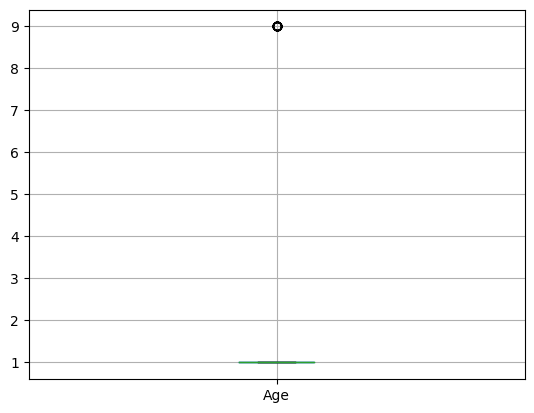

In [ ]:
# Строим boxplot
df_new.boxplot(column=['Age'])
plt.show()

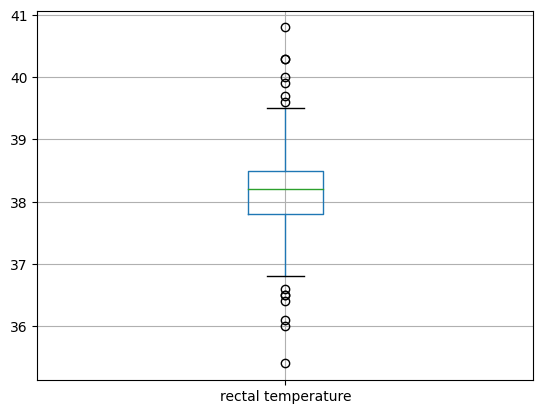

In [ ]:
df_new.boxplot(column=['rectal temperature'])
plt.show()

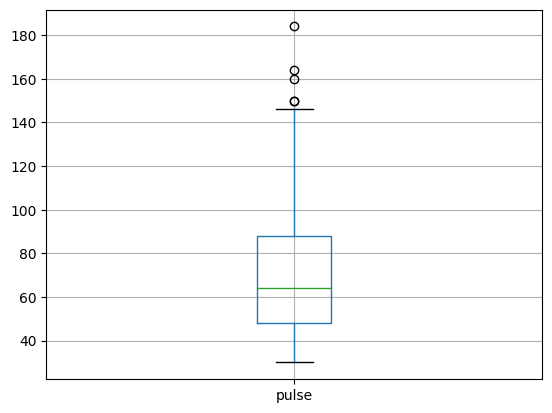

In [ ]:
df_new.boxplot(column=['pulse'])
plt.show()

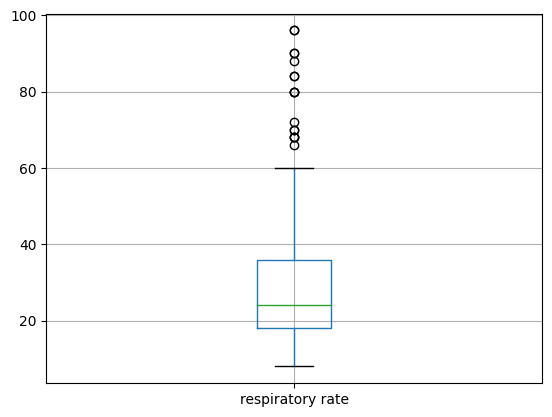

In [ ]:
df_new.boxplot(column=['respiratory rate'])
plt.show()

In [ ]:
#Выбросы значений температуры через межквартильный размах

q1 = df_new['rectal temperature'].quantile(0.25)
q3 = df_new['rectal temperature'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df_new[df_new['rectal temperature'].between(lower_bound, upper_bound, inclusive=True)]
remove_outliers

<ipython-input-18-93849a425456>:8: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  remove_outliers = df_new[df_new['rectal temperature'].between(lower_bound, upper_bound, inclusive=True)]


,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
1,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
2,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
3,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
5,1.0,1,37.9,48.0,16.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...
291,1.0,1,37.0,66.0,20.0,1.0,4.0,2.0
293,2.0,1,38.5,40.0,16.0,1.0,2.0,1.0
295,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
296,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0


In [ ]:
#Строки с выбросами по температуре
df_new[~df_new['rectal temperature'].between(lower_bound, upper_bound, inclusive=True)]

<ipython-input-19-b5fa080bfc72>:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df_new[~df_new['rectal temperature'].between(lower_bound, upper_bound, inclusive=True)]


,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
4,2.0,1,NaN,NaN,NaN,2.0,2.0,1.0
6,1.0,1,NaN,60.0,NaN,3.0,NaN,2.0
7,2.0,1,NaN,80.0,36.0,3.0,4.0,3.0
15,1.0,9,NaN,128.0,36.0,3.0,4.0,2.0
19,1.0,1,39.9,72.0,60.0,1.0,5.0,1.0
...,...,...,...,...,...,...,...,...
281,1.0,1,NaN,70.0,16.0,3.0,2.0,2.0
287,1.0,1,NaN,NaN,NaN,NaN,NaN,1.0
292,1.0,1,NaN,78.0,24.0,3.0,NaN,3.0
294,1.0,1,NaN,120.0,70.0,4.0,2.0,3.0


In [ ]:
#Выбросы значений пульса через межквартильный размах

q1 = df_new['pulse'].quantile(0.25)
q3 = df_new['pulse'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df_new[df_new['pulse'].between(lower_bound, upper_bound, inclusive=True)]
remove_outliers

<ipython-input-20-50d15fd206e1>:8: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  remove_outliers = df_new[df_new['pulse'].between(lower_bound, upper_bound, inclusive=True)]


,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
1,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
5,1.0,1,37.9,48.0,16.0,1.0,3.0,1.0
6,1.0,1,NaN,60.0,NaN,3.0,NaN,2.0
...,...,...,...,...,...,...,...,...
294,1.0,1,NaN,120.0,70.0,4.0,2.0,3.0
295,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
296,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0
297,1.0,1,36.5,100.0,24.0,3.0,3.0,1.0


In [ ]:
#Строки с выбросами по пульсу
df_new[~df_new['pulse'].between(lower_bound, upper_bound, inclusive=True)]

<ipython-input-21-35f6bfd3e98e>:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df_new[~df_new['pulse'].between(lower_bound, upper_bound, inclusive=True)]


,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
2,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,NaN,NaN,NaN,2.0,2.0,1.0
27,1.0,1,NaN,NaN,NaN,NaN,NaN,2.0
40,2.0,9,39.0,150.0,72.0,NaN,NaN,1.0
51,2.0,1,NaN,NaN,NaN,1.0,1.0,1.0
54,1.0,9,38.6,160.0,20.0,3.0,3.0,2.0
55,1.0,1,NaN,NaN,NaN,NaN,NaN,1.0
57,1.0,1,NaN,NaN,20.0,4.0,5.0,2.0
73,1.0,9,NaN,NaN,NaN,NaN,NaN,2.0
77,1.0,1,NaN,NaN,NaN,3.0,5.0,2.0


In [ ]:
#Выбросы значений Частоты дыхания через межквартильный размах

q1 = df_new['respiratory rate'].quantile(0.25)
q3 = df_new['respiratory rate'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df_new[df_new['respiratory rate'].between(lower_bound, upper_bound, inclusive=True)]
remove_outliers

<ipython-input-22-86a17881926b>:8: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  remove_outliers = df_new[df_new['respiratory rate'].between(lower_bound, upper_bound, inclusive=True)]


,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
1,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
5,1.0,1,37.9,48.0,16.0,1.0,3.0,1.0
7,2.0,1,NaN,80.0,36.0,3.0,4.0,3.0
...,...,...,...,...,...,...,...,...
293,2.0,1,38.5,40.0,16.0,1.0,2.0,1.0
295,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
296,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0
297,1.0,1,36.5,100.0,24.0,3.0,3.0,1.0


In [ ]:
#Строки с выбросами по Частоте дыхания
df_new[~df_new['respiratory rate'].between(lower_bound, upper_bound, inclusive=True)]

<ipython-input-23-23128ba766a8>:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df_new[~df_new['respiratory rate'].between(lower_bound, upper_bound, inclusive=True)]


,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
2,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,NaN,NaN,NaN,2.0,2.0,1.0
6,1.0,1,NaN,60.0,NaN,3.0,NaN,2.0
8,2.0,9,38.3,90.0,NaN,1.0,5.0,1.0
27,1.0,1,NaN,NaN,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...
273,1.0,1,NaN,76.0,NaN,NaN,NaN,3.0
280,2.0,1,40.0,78.0,NaN,3.0,2.0,2.0
283,2.0,1,38.5,54.0,NaN,1.0,3.0,1.0
287,1.0,1,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
df_new1 = df_new.copy()
df_new1.head()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
1,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
2,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
3,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
4,2.0,1,NaN,NaN,NaN,2.0,2.0,1.0


In [ ]:
#Удаляем строку, где нет сведений о проведенной операции лошади
df_new1[df_new1['surgery?'].isna()]

df_new1 = df_new1.dropna(subset=['surgery?'])
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 298
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    298 non-null    float64
 1   Age                         298 non-null    int64  
 2   rectal temperature          238 non-null    float64
 3   pulse                       274 non-null    float64
 4   respiratory rate            240 non-null    float64
 5   temperature of extremities  242 non-null    float64
 6   pain                        243 non-null    float64
 7   outcome                     298 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 21.0 KB


In [ ]:
#Заменяем  пустые значения боли, температуры конечностей и частоту дыхания на наиболее часто встречающиеся значения(моду).
df_new_mode = df_new1.copy()
df_new_mode['pain'] = df_new_mode['pain'].fillna(df_new1['pain'].mode()[0])
df_new_mode['temperature of extremities'] = df_new_mode['temperature of extremities'].fillna(df_new1['temperature of extremities'].mode()[0])
df_new_mode.info()
df_new_mode.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 298
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    298 non-null    float64
 1   Age                         298 non-null    int64  
 2   rectal temperature          238 non-null    float64
 3   pulse                       274 non-null    float64
 4   respiratory rate            240 non-null    float64
 5   temperature of extremities  298 non-null    float64
 6   pain                        298 non-null    float64
 7   outcome                     298 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 21.0 KB


,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,1.0,1,39.2,88.0,20.0,3.0,3.0,3.0
1,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
2,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
3,2.0,1,37.3,104.0,35.0,3.0,3.0,2.0
4,2.0,1,NaN,NaN,NaN,2.0,2.0,1.0


In [ ]:
#Заменяем пустые значения температуры на среднее

df_new_mean = df_new_mode.copy()
df_new_mean['rectal temperature'] = df_new_mean['rectal temperature'].fillna(df_new['rectal temperature'].mean())

df_new_mean.info()
df_new_mean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 298
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    298 non-null    float64
 1   Age                         298 non-null    int64  
 2   rectal temperature          298 non-null    float64
 3   pulse                       274 non-null    float64
 4   respiratory rate            240 non-null    float64
 5   temperature of extremities  298 non-null    float64
 6   pain                        298 non-null    float64
 7   outcome                     298 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 21.0 KB


,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,1.0,1,39.200000,88.0,20.0,3.0,3.0,3.0
1,2.0,1,38.300000,40.0,24.0,1.0,3.0,1.0
2,1.0,9,39.100000,164.0,84.0,4.0,2.0,2.0
3,2.0,1,37.300000,104.0,35.0,3.0,3.0,2.0
4,2.0,1,38.166527,NaN,NaN,2.0,2.0,1.0


In [ ]:
#Заменяем пустые значения пульса и частоты дыхания на медиану

df_new_median = df_new_mean.copy()
df_new_median['pulse'] = df_new_median['pulse'].fillna(df_new['pulse'].median())
df_new_median['respiratory rate'] = df_new_median['respiratory rate'].fillna(df_new['pulse'].median())
df_new_median.info()
df_new_median.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 298
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    298 non-null    float64
 1   Age                         298 non-null    int64  
 2   rectal temperature          298 non-null    float64
 3   pulse                       298 non-null    float64
 4   respiratory rate            298 non-null    float64
 5   temperature of extremities  298 non-null    float64
 6   pain                        298 non-null    float64
 7   outcome                     298 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 21.0 KB


,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,1.0,1,39.200000,88.0,20.0,3.0,3.0,3.0
1,2.0,1,38.300000,40.0,24.0,1.0,3.0,1.0
2,1.0,9,39.100000,164.0,84.0,4.0,2.0,2.0
3,2.0,1,37.300000,104.0,35.0,3.0,3.0,2.0
4,2.0,1,38.166527,64.0,64.0,2.0,2.0,1.0


In [ ]:
 #Так как в столбце 'Age' есть явная ошибка в виде значения "9"(которого нет в документации), предполагаем что цифра "9" это ощибочно внесенная 2 категория и заменим все 9 на 2
 df_full = df_new_median.copy()
 df_full['Age'] = df_full['Age'].replace(9, 2)
 df_full

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,1.0,1,39.200000,88.0,20.0,3.0,3.0,3.0
1,2.0,1,38.300000,40.0,24.0,1.0,3.0,1.0
2,1.0,2,39.100000,164.0,84.0,4.0,2.0,2.0
3,2.0,1,37.300000,104.0,35.0,3.0,3.0,2.0
4,2.0,1,38.166527,64.0,64.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...
294,1.0,1,38.166527,120.0,70.0,4.0,2.0,3.0
295,2.0,1,37.200000,72.0,24.0,3.0,4.0,3.0
296,1.0,1,37.500000,72.0,30.0,4.0,4.0,2.0
297,1.0,1,36.500000,100.0,24.0,3.0,3.0,1.0


In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 298
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    298 non-null    float64
 1   Age                         298 non-null    int64  
 2   rectal temperature          298 non-null    float64
 3   pulse                       298 non-null    float64
 4   respiratory rate            298 non-null    float64
 5   temperature of extremities  298 non-null    float64
 6   pain                        298 non-null    float64
 7   outcome                     298 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 21.0 KB


In [ ]:
df_new.describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,298.000000,299.00000,239.000000,275.000000,241.000000,243.000000,244.000000,298.000000
mean,1.395973,1.64214,38.166527,71.934545,30.427386,2.345679,2.942623,1.550336
std,0.489881,2.17730,0.733508,28.680522,17.678256,1.046369,1.303993,0.737967
min,1.000000,1.00000,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000
25%,1.000000,1.00000,37.800000,48.000000,18.000000,1.000000,2.000000,1.000000
50%,1.000000,1.00000,38.200000,64.000000,24.000000,3.000000,3.000000,1.000000
75%,2.000000,1.00000,38.500000,88.000000,36.000000,3.000000,4.000000,2.000000
max,2.000000,9.00000,40.800000,184.000000,96.000000,4.000000,5.000000,3.000000


In [ ]:
df_full.describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,1.395973,1.080537,38.167086,71.375839,36.996644,2.466443,2.949664,1.550336
std,0.489881,0.272580,0.656551,27.599218,20.711990,0.978153,1.178147,0.737967
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,37.900000,48.250000,20.000000,1.000000,2.000000,1.000000
50%,1.000000,1.000000,38.166527,64.000000,30.000000,3.000000,3.000000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,63.000000,3.000000,4.000000,2.000000
max,2.000000,2.000000,40.800000,184.000000,96.000000,4.000000,5.000000,3.000000
